# Data Cleaning for BPS Map

Steps implimented here:
1. Load CSV from Analyze Boston
2. Remove punctuation for D3 loading, print CSV
3. Visualize subject capacity with Seaborn

In [127]:
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import csv
capacity=pd.read_csv(r'C:\Users\schro\Desktop\Projects\d3\BostonSchools\ca0bda4c78c62b0842ef788303d65a75\capacity.csv', delimiter=',')
print capacity.info()
#remove dollar and stuff
capacity['perc_util']=capacity['perc_util'].str.replace(r"%","")
capacity['perc_util_cap']=capacity['perc_util_cap'].str.replace(r"%","")
capacity.set_value(2, 'neighborhood', 'Central')
capacity.set_value(0, 'neighborhood', 'Allston/Brighton')

print capacity
#capacity.to_csv(r'C:\Users\schro\Desktop\Projects\d3\BostonSchools\ca0bda4c78c62b0842ef788303d65a75\capacity2.csv', delimiter=',')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
neighborhood       17 non-null object
21capacity         17 non-null object
seats              17 non-null object
dif_utilized       17 non-null object
perc_util          17 non-null object
currentcapacity    17 non-null object
currentseats       17 non-null object
perc_util_cap      17 non-null object
dtypes: object(8)
memory usage: 1.1+ KB
None
            neighborhood 21capacity   seats dif_utilized perc_util  \
0       Allston/Brighton      4,282   4,248          -34       101   
1   Back Bay/Beacon Hill        373     215         -158       174   
2                Central      1,990   2,217          227        90   
3            Charlestown      2,389   2,537          148        94   
4             Dorchester      8,411   8,494           83        99   
5            East Boston      5,244   4,308         -936       122   
6         Fenway/Kenmore      3,393   2,884         -509   

SMMA_EA_ES_Adequacy_Music
Deficient    33
Poor         15
Good          1
Name: SMMA_EA_ES_Adequacy_Music, dtype: int64
SMMA_EA_MS_Adequacy_Music
Deficient    3
Poor         3
Fair         1
Name: SMMA_EA_MS_Adequacy_Music, dtype: int64
SMMA_EA_HS712_Adequacy_Music
Deficient    4
Poor         2
Excellent    1
Name: SMMA_EA_HS712_Adequacy_Music, dtype: int64
SMMA_EA_HS912_Adequacy_Music
Deficient    18
Poor          7
Excellent     1
Fair          1
Good          1
Name: SMMA_EA_HS912_Adequacy_Music, dtype: int64
SMMA_EA_K8_Adequacy_Music
Deficient    17
Poor         15
Fair          2
Excellent     1
Good          1
Name: SMMA_EA_K8_Adequacy_Music, dtype: int64
SMMA_EA_MS_Adequacy_Science
Poor         5
Deficient    1
Fair         1
Name: SMMA_EA_MS_Adequacy_Science, dtype: int64
SMMA_EA_HS712_Adequacy_Science
Poor         4
Fair         2
Deficient    1
Name: SMMA_EA_HS712_Adequacy_Science, dtype: int64
SMMA_EA_HS912_Adequacy_Science
Poor         20
Deficient     4
Fair          2
Goo

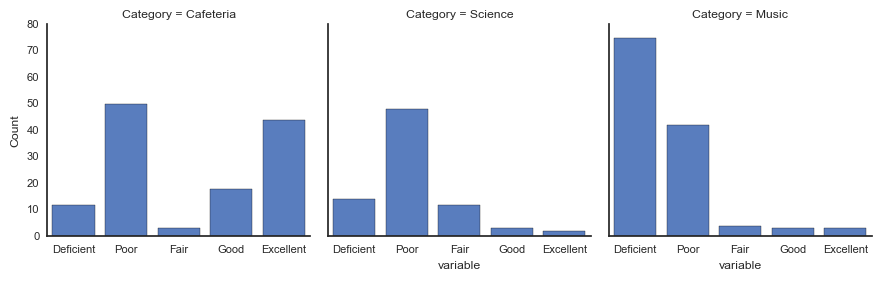

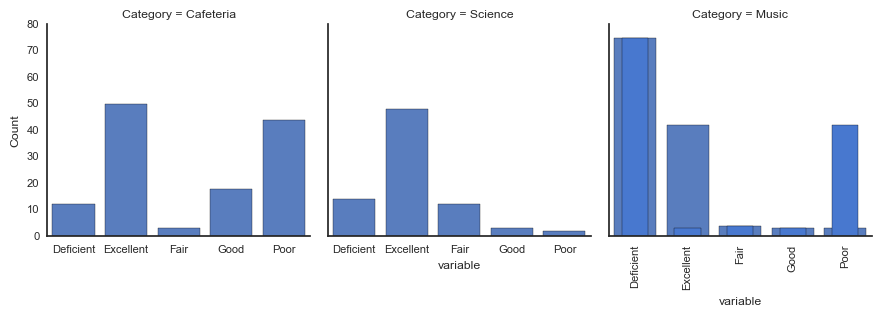

In [339]:
#art columns
musics=['SMMA_EA_ES_Adequacy_Music', 'SMMA_EA_MS_Adequacy_Music','SMMA_EA_HS712_Adequacy_Music', 
'SMMA_EA_HS912_Adequacy_Music', 'SMMA_EA_K8_Adequacy_Music']
sciences=['SMMA_EA_MS_Adequacy_Science','SMMA_EA_HS712_Adequacy_Science', 
'SMMA_EA_HS912_Adequacy_Science', 'SMMA_EA_K8_Adequacy_Science']
cafeterias=['SMMA_EA_ES_Adequacy_Cafeteria', 'SMMA_EA_MS_Adequacy_Cafeteria','SMMA_EA_HS712_Adequacy_Cafeteria', 
'SMMA_EA_HS912_Adequacy_Cafeteria', 'SMMA_EA_K8_Adequacy_Cafeteria']

def value_plots(df,columns):
    counts=pd.Series()
    for col in columns:
        print col
        print df[col].value_counts()
        counts=counts.add(df[col].value_counts(),fill_value=0)
    return counts

plt.style.use(['seaborn-paper'])


#create dataframes
music_data=value_plots(bps,musics)
music_data["Category"]="Music"
science_data=value_plots(bps,sciences)

science_data["Category"]="Science"
cafeteria_data=value_plots(bps,cafeterias)

cafeteria_data["Category"]="Cafeteria"
ax.set_ylabel("Count")
ax.set_xlabel("")
value_plots(bps,musics).plot(kind='bar')
plt.show()
df = pd.DataFrame([music_data,science_data])



In [301]:
ax=sns.barplot(x=music_data.index,y=music_data,estimator=lambda x: x / sum(music_data) * 100, 
              order=[u'Deficient', u'Poor', u'Excellent', u'Fair', u'Good'])
ax.set(ylabel="Percent")
plt.show()


ValueError: Neither the `x` nor `y` variable appears to be numeric.

Index([u'Deficient', u'Excellent', u'Fair', u'Good', u'Poor', u'Category'], dtype='object')
   Deficient  Excellent  Fair  Good  Poor Category
0       75.0        3.0   4.0   3.0  42.0    Music
1       14.0        2.0  12.0   3.0  48.0  Science
4.0
4.0


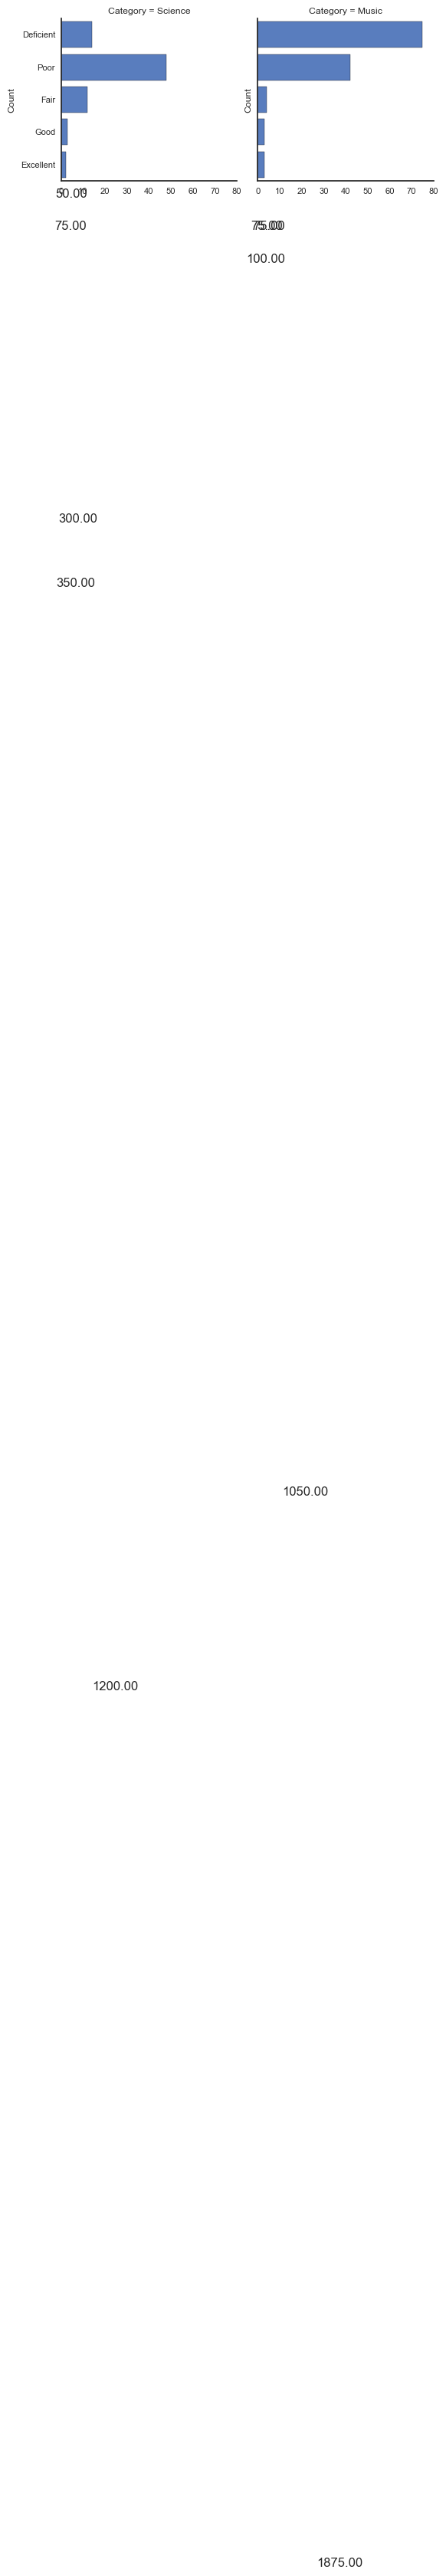

In [348]:
print(music_data.index)
#ax=sns.barplot(x=music_data.index,y=music_data,estimator=lambda x: x / sum(music_data) * 100, 
#               order=[u'Deficient', u'Poor', u'Excellent', u'Fair', u'Good'])
#ax.set(ylabel="Percent")

df2=pd.melt(df, id_vars=['Category'])
print df

plt.style.use(['seaborn-paper'])
g = sns.FacetGrid(
    df2, col='Category', col_order=['Science','Music'])
import math
# Create the bar plot on each subplot
g.map(sns.barplot,'value', 'variable',
               order=[u'Deficient', u'Poor', u'Fair', u'Good', u'Excellent'])
axes = np.array(g.axes.flat)
for ax in axes:
    ax.set_ylabel("Count")
    ax.set_xlabel("")
    total=0
    
    for p in ax.patches:
        total+=p.get_height()
    print total
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_y()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format((height/total*100.0)),
                ha="center") 
    
# one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig(r"C:\Users\schro\Desktop\Projects\d3\BostonSchools\output.svg",transparent=True)

plt.show()

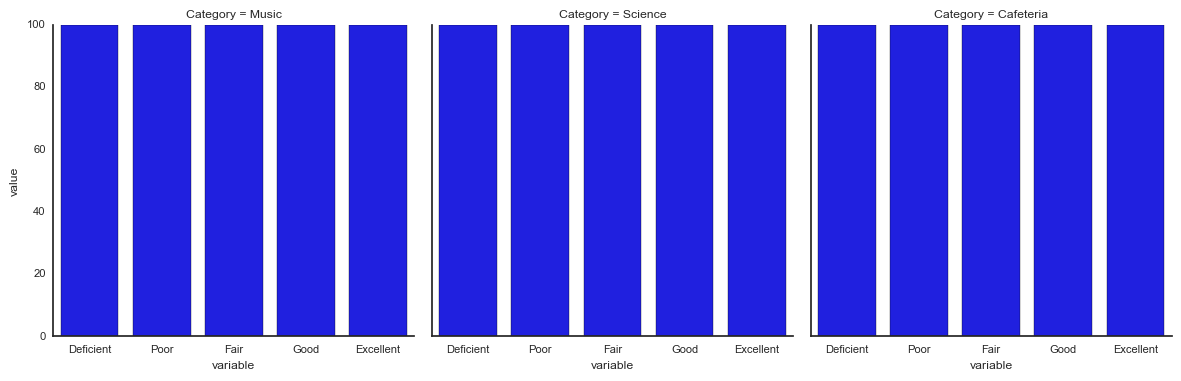

In [298]:
h = sns.factorplot(x="variable", y="value",
                    data=df2, kind="bar",col='Space',color='blue',sharey =True,estimator=lambda x: x*100.0/x.sum(),
                    order=[u'Deficient', u'Poor', u'Fair', u'Good', u'Excellent'])

ax.set_ylabel("Count")
ax.set_xlabel("")
    
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig(r"C:\Users\schro\Desktop\Projects\d3\BostonSchools\output.svg",transparent=True)
plt.show()

['SMMA_Identifier',
 'SMMA_Only_For_Map',
 'BPS_School_Name',
 'BPS_Historical_Name',
 'SMMA_Abbreviated_Name',
 'BPS_Address',
 'BRA_Neighborhood',
 'SMMA_latitude',
 'SMMA_longitude',
 'SMMA_Typology',
 'SMMA_Educational_Program',
 'BPS_Grades_Offered',
 'BPS_Property_Status',
 'BPS_Total_GSF',
 'BPS_GSF',
 'SMMA_Site_SF',
 'SMMA_Site_Acres',
 'BPS_Year_Founded ',
 'BPS_Year_Built',
 'MSBA_Year_Reno',
 'SMMA_Era',
 'BPS_Plans',
 'BPS_Principal',
 'BPS_Open',
 'BPS_Close',
 'DOE_ID',
 'DOE_Total',
 'DOE_PK',
 'DOE_K',
 'DOE_1',
 'DOE_2',
 'DOE_3',
 'DOE_4',
 'DOE_5',
 'DOE_6',
 'DOE_7',
 'DOE_8',
 'DOE_9',
 'DOE_10',
 'DOE_11',
 'DOE_12',
 'DOE_SP',
 'GSF / Student Value',
 'BPS_KWH',
 ' BPS_Electric_Bill ',
 'BPS_Therms',
 ' BPS_Gas_Bill ',
 'BPS_Water_ft_cubic',
 ' BPS_Water_Bill ',
 ' BPS_Total_Energy_Cost ',
 'Climate_Priority',
 'Climate_Risk',
 'SMMA_FA_Visit_Date',
 'SMMA_FA_Status',
 'SMMA_FA_School_Enrollment',
 'SMMA_FA_Enrollment_Building',
 'SMMA_FA_Major_Investments',
 'S

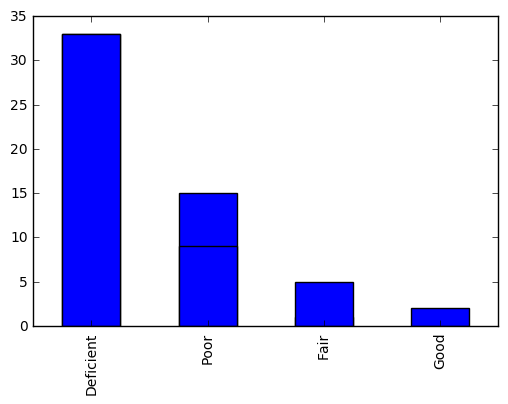

In [104]:

cols=['School Name', 'Typology', 'Population', 'Assessed Building Value', 
      'Compliance Trigger', 'Building Repair', 'Site Repair', 'Renovation', 'Resiliency' ,'Program Upgrades', 'Total']
bps=pd.read_csv(r'C:\Users\schro\Desktop\Projects\d3\BostonSchools\ca0bda4c78c62b0842ef788303d65a75\buildbps.csv', delimiter=',')
#cost=pd.read_(r'C:\Users\schro\Desktop\Projects\d3\BostonSchools\ca0bda4c78c62b0842ef788303d65a75\cost.csv', delimiter=',')
#pprint(list(bps.columns.values))y


print bps.SMMA_EA_ES_Adequacy_Music.value_counts().plot(kind="bar")

print bps.SMMA_EA_ES_Adequacy_Art.value_counts().plot(kind="bar")


counties= bps.SMMA_EA_ES_Adequacy_Art.value_counts()
c2=bps.SMMA_EA_ES_Adequacy_Music.value_counts()
print counties.add(c2,fill_value=0)
print counties+c2

import matplotlib.pyplot as plt
plt.show()
